### Forecasting Assignment

In [1]:
!pip install matplotlib
import pandas as pd 
from numpy import sqrt
import numpy as np 
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, time
import matplotlib.pyplot as plt
from matplotlib import *
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Airlines+Data.xlsx')
data[:3]

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [3]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
data.shape

(96, 2)

In [5]:
# checking the null values
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
# Checking the datatype of the attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format = True)
indexedDataset = data.set_index(['Month'])
data.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


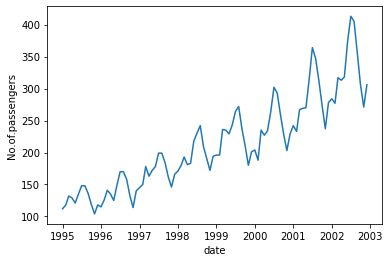

In [8]:
plt.xlabel("date")
plt.ylabel("No.of.passengers")
plt.plot(indexedDataset)

In [9]:
rolmean = indexedDataset.rolling(window=12).mean()

In [10]:
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


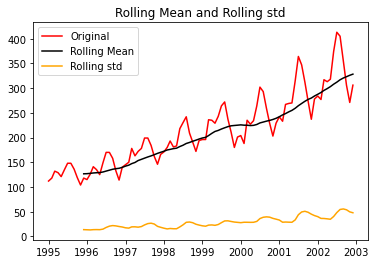

In [11]:
orig = plt.plot(indexedDataset, color='red', label = 'Original')
mean = plt.plot(rolmean, color = 'black', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'orange', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling std')
plt.show(block=False)

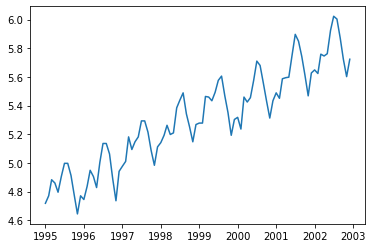

In [12]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [13]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()

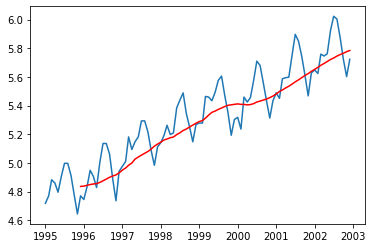

In [14]:
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [15]:
df = indexedDataset_logScale - movingAverage
df.head(4)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN


In [16]:
df.dropna(inplace = True)

In [17]:
df[:3]

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566


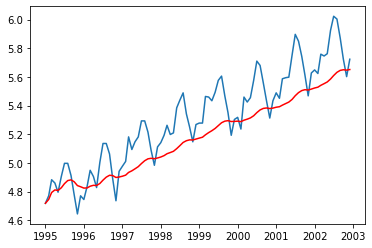

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

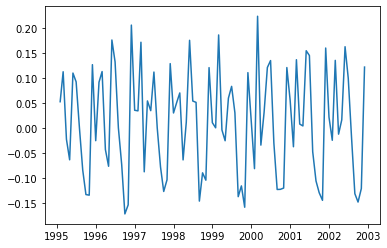

In [19]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale-exponentialDecayWeightedAverage
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [20]:
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-01-01,NaN
1995-02-01,0.052186
1995-03-01,0.112117


In [21]:
datasetLogDiffShifting.dropna(inplace=True)
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990


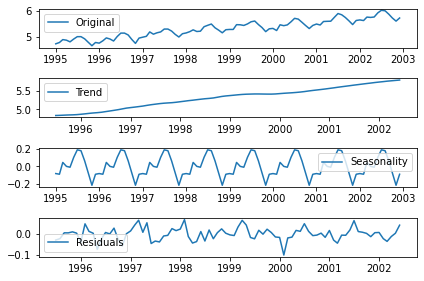

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
decompositionLogData = residual
decompositionLogData.dropna(inplace=True)

In [23]:
from statsmodels.tsa.stattools import acf,pacf

In [24]:
acf = acf(datasetLogDiffShifting, nlags = 20)
pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

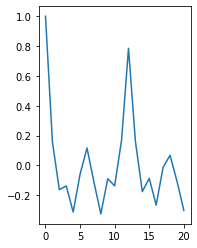

In [25]:
plt.subplot(121)
plt.plot(acf)

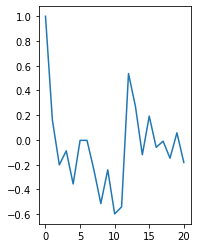

In [26]:
plt.subplot(122)
plt.plot(pacf)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


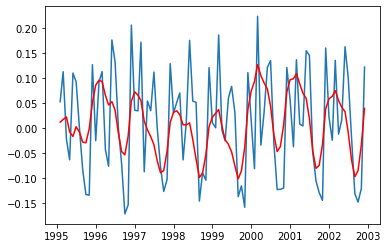

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale, order= (2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')

In [28]:
predictions_ARIMA_diff = pd.Series(results_AR. fittedvalues,copy = True)

In [29]:
predictions_ARIMA_diff

Month
1995-02-01    0.011261
1995-03-01    0.016603
1995-04-01    0.021666
1995-05-01   -0.008085
1995-06-01   -0.017391
                ...   
2002-08-01   -0.064341
2002-09-01   -0.097830
2002-10-01   -0.085649
2002-11-01   -0.033950
2002-12-01    0.038845
Length: 95, dtype: float64

In [30]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1995-02-01    0.011261
1995-03-01    0.027864
1995-04-01    0.049530
1995-05-01    0.041445
1995-06-01    0.024053
                ...   
2002-08-01    0.954406
2002-09-01    0.856576
2002-10-01    0.770927
2002-11-01    0.736977
2002-12-01    0.775822
Length: 95, dtype: float64

In [31]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

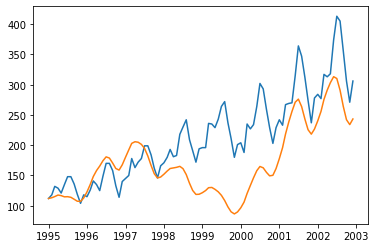

In [32]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

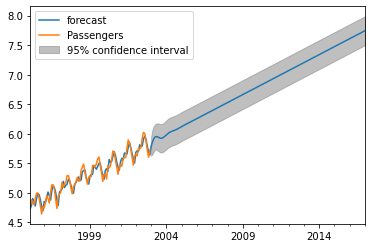

In [33]:
results_AR.plot_predict(1,264)
results = results_AR.forecast(steps = 100)

In [34]:
results[1]

array([0.08322497, 0.10432588, 0.10878368, 0.10878706, 0.1112883 ,
       0.11614999, 0.12023826, 0.12204097, 0.1222867 , 0.12234864,
       0.12286181, 0.12359024, 0.12410256, 0.12427851, 0.12428673,
       0.12431598, 0.12441318, 0.1245196 , 0.12457998, 0.12459417,
       0.1245942 , 0.12460316, 0.12462087, 0.12463633, 0.12464341,
       0.12464445, 0.12464463, 0.12464643, 0.12464902, 0.12465082,
       0.1246514 , 0.12465141, 0.12465157, 0.12465203, 0.12465252,
       0.12465281, 0.1246529 , 0.1246529 , 0.12465292, 0.12465296,
       0.12465299, 0.124653  , 0.124653  , 0.12465301, 0.12465303,
       0.12465306, 0.12465308, 0.12465309, 0.12465309, 0.1246531 ,
       0.1246531 , 0.1246531 , 0.1246531 , 0.1246531 , 0.1246531 ,
       0.12465311, 0.12465311, 0.12465312, 0.12465312, 0.12465313,
       0.12465313, 0.12465313, 0.12465313, 0.12465314, 0.12465314,
       0.12465314, 0.12465315, 0.12465315, 0.12465315, 0.12465316,
       0.12465316, 0.12465316, 0.12465317, 0.12465317, 0.12465

In [35]:
len(results[1])

100